In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import sys
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pyclustering.cluster import xmeans
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils import read_sample
from pyclustering.cluster import cluster_visualizer_multidim
#from fma_metadata import utils

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (13, 5)

In [2]:
df = pd.read_csv('../data/reduced_cleaned_files/train_reduced_cleaned_withNames.csv')
df.head()

,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,...,fBodyBodyGyroMagmad,fBodyBodyGyroMagsma,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagentropy,angleXgravityMean,angleYgravityMean,Activity
0,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,...,-0.973653,-0.980135,-0.992656,-0.701291,-0.991990,-0.991990,-0.871306,-0.841247,0.179941,5
1,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,...,-0.982659,-0.988296,-0.993979,-0.720683,-0.995854,-0.995854,-1.000000,-0.844788,0.180289,5
2,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,...,-0.984274,-0.989255,-0.993238,-0.736521,-0.995031,-0.995031,-1.000000,-0.848933,0.180637,5
3,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,-0.576159,-0.829711,0.843609,...,-0.986850,-0.989413,-0.989136,-0.720891,-0.995221,-0.995221,-0.955696,-0.848649,0.181935,5
4,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,-0.569174,-0.824705,0.849095,...,-0.987744,-0.991433,-0.989321,-0.763372,-0.995093,-0.995093,-1.000000,-0.847865,0.185151,5


Si considerano solo le variabili numeriche (non activity)

In [3]:
train = pd.read_csv('../data/reduced_cleaned_files/train_reduced_cleaned_withNames.csv')
X_train = train.drop(['Activity'], axis=1)

y_train = train['Activity']
y_train = pd.DataFrame(y_train)
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))

X_train and y_train : ((7261, 200),(7261, 1))


In [4]:
y_train['Activity'].value_counts()

5    1367
6    1357
4    1262
1    1226
2    1073
3     976
Name: Activity, dtype: int64

# Preprocessing

Performiamo la normalizzazione
- nel dataset originale Features are normalized and bounded within [-1,1];
- con MinMaxScaler hannp un range [0,1]

In [5]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X_train)

# K-means

In [6]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

Si individua il numero k con l'elbow/silhouette method

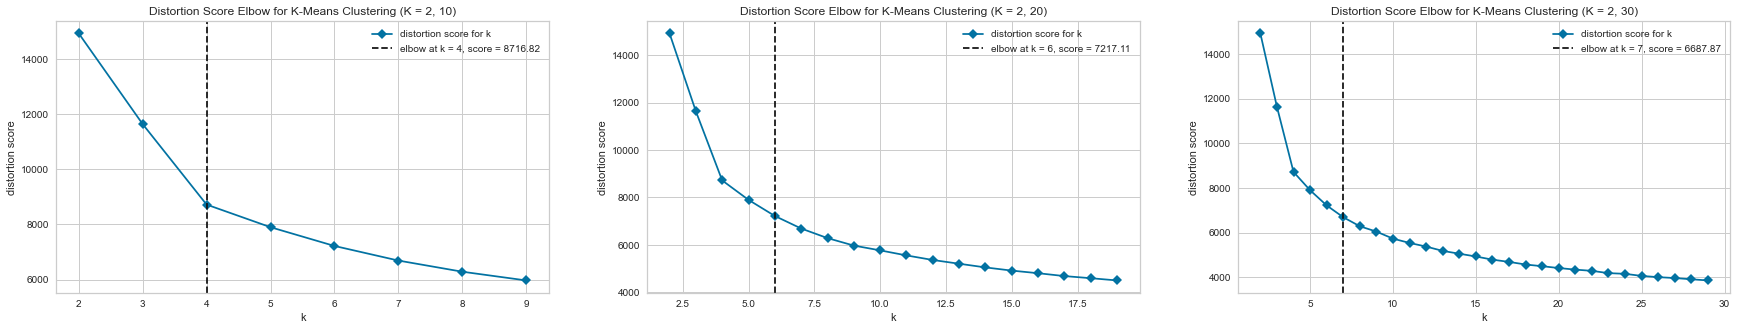

In [7]:
k_start = [2]
k_max = [10, 20, 30]
Ks = []
model = KMeans()

# print the elbow plots
f, axs = plt.subplots(nrows=1, ncols=len(k_max), figsize=(30,5))

for i in range(len(k_max)):
    vis = KElbowVisualizer(model, k=(k_start[0],k_max[i]), metric='distortion', timings=False, ax=axs[i])
    vis.fit(X)  
    axs[i].set_title('Distortion Score Elbow for K-Means Clustering (K = ' + str(k_start[0]) + ', ' + str(k_max[i]) + ')' )
    axs[i].set_ylabel('distortion score')
    axs[i].set_xlabel('k')
    axs[i].legend(['distortion score for k','elbow at k = ' + str(vis.elbow_value_) + ', score = ' + '{:.2f}'.format(vis.elbow_score_)])
    if (vis.elbow_value_ not in Ks) and (vis.elbow_value_ != None):
        Ks.append(vis.elbow_value_)
plt.show()

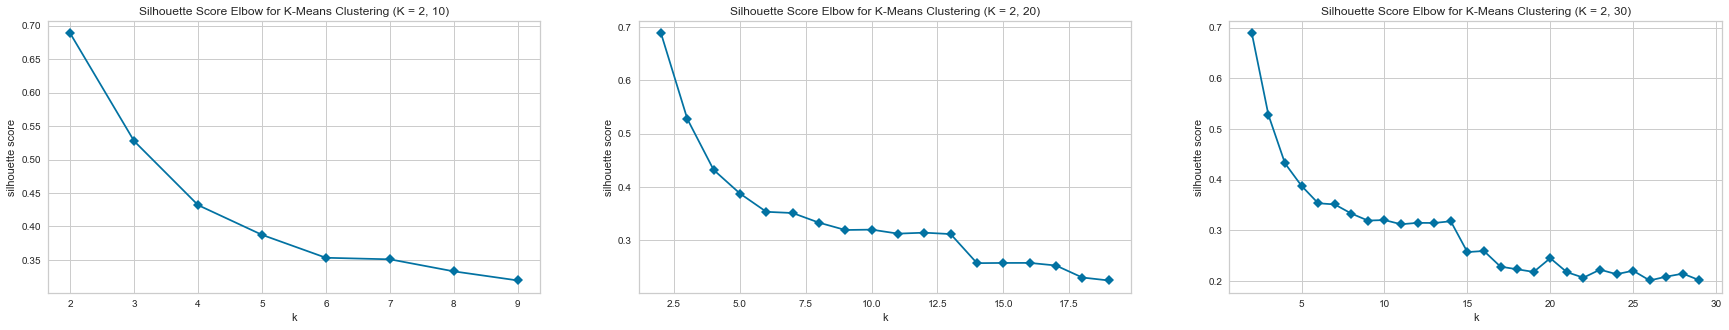

In [8]:
k_start = [2]
k_max = [10, 20, 30]
model = KMeans()

# print the elbow plots
f, axs = plt.subplots(nrows=1, ncols=len(k_max), figsize=(30,5))

for i in range(len(k_max)):
    vis = KElbowVisualizer(model, k=(k_start[0],k_max[i]), metric='silhouette', timings=False, ax=axs[i], locate_elbow=False)
    vis.fit(X)  
    axs[i].set_title('Silhouette Score Elbow for K-Means Clustering (K = ' + str(k_start[0]) + ', ' + str(k_max[i]) + ')' )
    axs[i].set_ylabel('silhouette score')
    axs[i].set_xlabel('k')
plt.show()

Scelto k = 6 come il numero di attività

Kmeans con k = 6:

In [9]:
k = 6

kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100) 
kmeans.fit(X) # we perform the clustering for each value of k

centers = scaler.inverse_transform(kmeans.cluster_centers_) # it contains the centroids for the optimal value of k
labels = kmeans.labels_ # # it contains the labels for the optimal value of k
X_inertia = kmeans.inertia_

In [10]:
X_train_cl = X_train.join(y_train['Activity'])
cluster_col = 'K_' + str(k) # it contains the name of the column containing the optimal labels
X_train_cl[cluster_col] = labels

X_train_cl.head()

,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,...,fBodyBodyGyroMagsma,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagentropy,angleXgravityMean,angleYgravityMean,Activity,K_6
0,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,...,-0.980135,-0.992656,-0.701291,-0.991990,-0.991990,-0.871306,-0.841247,0.179941,5,4
1,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,...,-0.988296,-0.993979,-0.720683,-0.995854,-0.995854,-1.000000,-0.844788,0.180289,5,4
2,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,...,-0.989255,-0.993238,-0.736521,-0.995031,-0.995031,-1.000000,-0.848933,0.180637,5,4
3,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,-0.576159,-0.829711,0.843609,...,-0.989413,-0.989136,-0.720891,-0.995221,-0.995221,-0.955696,-0.848649,0.181935,5,4
4,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,-0.569174,-0.824705,0.849095,...,-0.991433,-0.989321,-0.763372,-0.995093,-0.995093,-1.000000,-0.847865,0.185151,5,4


In [11]:
def autolabel(rects, i = None, j = None):
    if (i != None) and (j!=None): 
        target = axs[i][j]
    elif i != None:
        target = axs[i]
    else:
        target = axs    
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        target.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

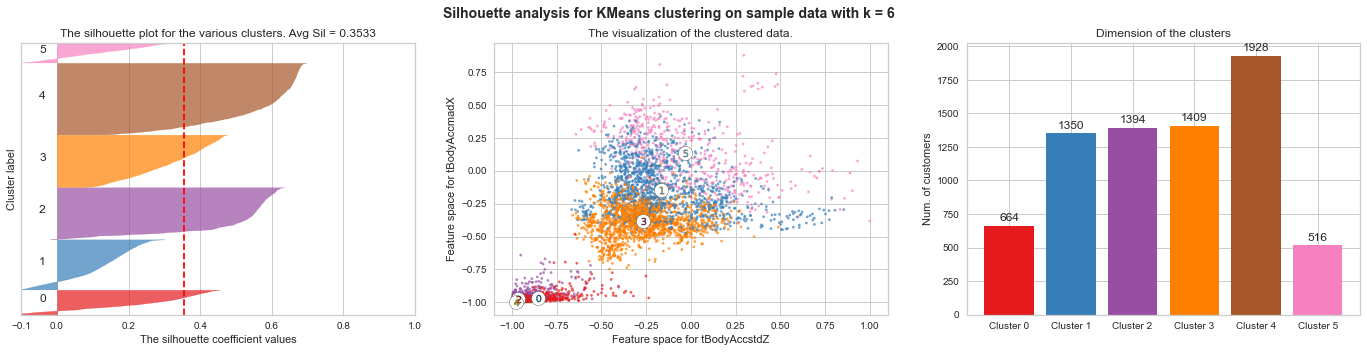

In [12]:
# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(24, 5)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
axs[0].set_xlim([-0.1, 1])
# The (k+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
axs[0].set_ylim([0, len(X) + (k + 1) * 10])

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, labels)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, labels)
bar_colors = []
y_lower = 10
for i in range(k):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.Set1(float(i) / k)
    bar_colors.append(color)
    axs[0].fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    axs[0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

axs[0].set_title("The silhouette plot for the various clusters. Avg Sil = " + '{:.4f}'.format(silhouette_avg))
axs[0].set_xlabel("The silhouette coefficient values")
axs[0].set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
axs[0].axvline(x=silhouette_avg, color="red", linestyle="--")

axs[0].set_yticks([])  # Clear the yaxis labels / ticks
axs[0].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed -------------QUI SI CAMBIANO LE COLONNE
colors = cm.Set1(labels.astype(float) / k)
axs[1].scatter(X_train_cl[X_train_cl.columns[2]], X_train_cl[X_train_cl.columns[3]], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

# Draw white circles at cluster centers
axs[1].scatter(centers[:, 2], centers[:, 3], marker='o', c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    axs[1].scatter(c[2], c[3], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

# ----------------------    QUI SI CAMBIANO LE COLONNE
axs[1].set_title("The visualization of the clustered data.")
axs[1].set_xlabel("Feature space for " + X_train_cl.columns[2])
axs[1].set_ylabel("Feature space for " + X_train_cl.columns[3])

hist, bins = np.histogram(labels, bins=range(0, len(set(labels)) + 1))
autolabel(axs[2].bar(list(range(0,len(set(labels)))), hist, color=bar_colors, tick_label=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4',  'Cluster 5']), 2)
axs[2].set_title('Dimension of the clusters')
axs[2].set_ylabel('Num. of customers')

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with k = %d" % k), fontsize=14, fontweight='bold')
plt.show()

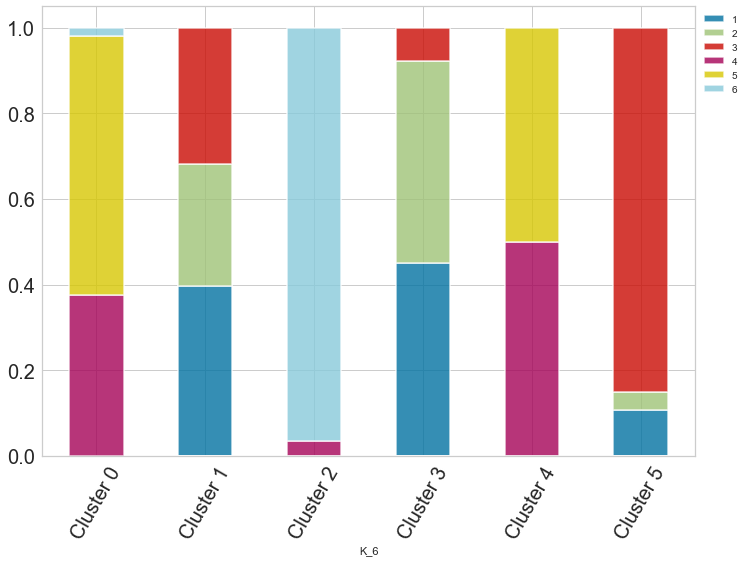

In [13]:
bar = df['Activity'].groupby(X_train_cl['K_6']).value_counts(normalize = True).unstack(1)
bar.plot(kind='bar',stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)
plt.xticks([0, 1, 2,3,4,5],['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4',  'Cluster 5'], rotation = 60, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor =(1,1))



plt.show()

- Cluster 0 = attività SOLO statiche
- Cluster 1 = Attività SOLO dinamiche
- Cluster 2 = Attività statiche 6 e 4 
- Cluster 3 = Attivitò SOLO dinamiche
- Cluster 4 = attivitò statiche 4 e 5
- Cluster 5 = attività SOLO dinamiche

# X-means

In [14]:
# Prepare initial centers - amount of initial centers defines amount of clusters from which X-Means will
# start analysis.
amount_initial_centers = 2
initial_centers = kmeans_plusplus_initializer(X, amount_initial_centers).initialize()

In [15]:
# performs cluster analysis using X-Means
xmeans_instance = xmeans.xmeans(X, initial_centers, kmax  = 6)
xmeans_instance.process()

In [16]:
# Extract clustering results: clusters and their centers
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()

In [17]:
len(clusters)

6

In [18]:
labels

array([4, 4, 4, ..., 3, 3, 3])

In [19]:
X_train_cl = X_train.join(y_train['Activity'])
cluster_col = 'K_' + str(k) # it contains the name of the column containing the optimal labels
X_train_cl = X_train.join(y_train['Activity'])
X_train_cl[cluster_col] = ''

In [20]:
for label, indexes in enumerate(clusters): 
    X_train_cl.iloc[indexes, X_train_cl.columns.get_loc(cluster_col)] = label

In [21]:
X_train_cl

,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,...,fBodyBodyGyroMagsma,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagentropy,angleXgravityMean,angleYgravityMean,Activity,K_6
0,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,...,-0.980135,-0.992656,-0.701291,-0.991990,-0.991990,-0.871306,-0.841247,0.179941,5,4
1,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,...,-0.988296,-0.993979,-0.720683,-0.995854,-0.995854,-1.000000,-0.844788,0.180289,5,4
2,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,...,-0.989255,-0.993238,-0.736521,-0.995031,-0.995031,-1.000000,-0.848933,0.180637,5,4
3,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,-0.576159,-0.829711,0.843609,...,-0.989413,-0.989136,-0.720891,-0.995221,-0.995221,-0.955696,-0.848649,0.181935,5,4
4,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,-0.569174,-0.824705,0.849095,...,-0.991433,-0.989321,-0.763372,-0.995093,-0.995093,-1.000000,-0.847865,0.185151,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7256,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,0.029369,-0.076700,0.273480,...,-0.332753,-0.292601,0.577573,-0.681097,-0.681097,0.310836,-0.791883,0.238604,2,0
7257,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,0.029369,-0.031966,0.282174,...,-0.357992,-0.427577,0.620646,-0.682756,-0.682756,0.207930,-0.771840,0.252676,2,0
7258,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,-0.110405,0.055411,0.263175,...,-0.351948,-0.241789,0.584816,-0.685851,-0.685851,0.158936,-0.779133,0.249145,2,0
7259,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,-0.149495,0.055411,0.234850,...,-0.415004,-0.513205,0.445207,-0.712131,-0.712131,0.210070,-0.785181,0.246432,2,1


In [22]:
labels = list(X_train_cl[cluster_col])
labels = np.array(labels)

In [23]:
labels

array([4, 4, 4, ..., 0, 1, 1])

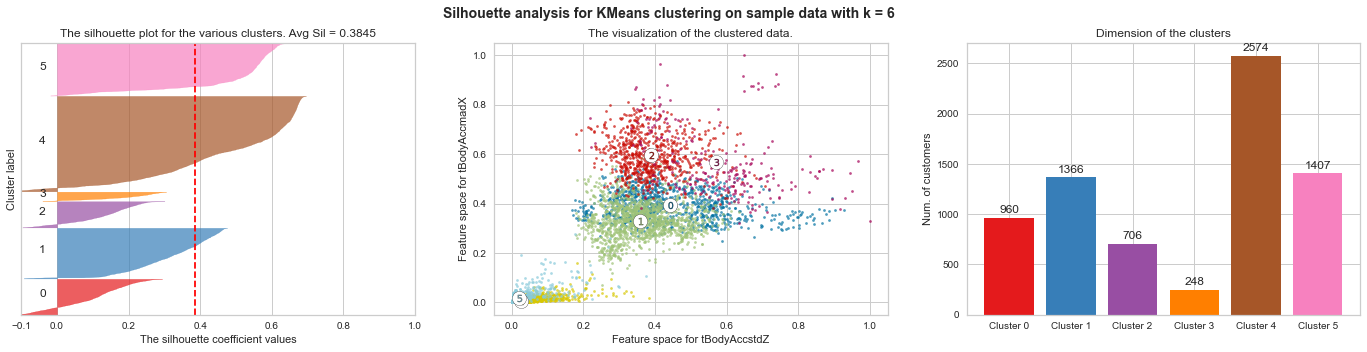

In [24]:
# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(24, 5)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
axs[0].set_xlim([-0.1, 1])
# The (k+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
axs[0].set_ylim([0, len(X) + (k + 1) * 10])

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, labels)

silhouette_values = silhouette_samples(X, labels)
bar_colors = []
y_lower = 10
for i in range(k):
    
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[labels == i]
    
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    
    y_upper = y_lower + size_cluster_i

    color = cm.Set1(float(i) / k)
    bar_colors.append(color)
    
    axs[0].fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    axs[0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

axs[0].set_title("The silhouette plot for the various clusters. Avg Sil = " + '{:.4f}'.format(silhouette_avg))
axs[0].set_xlabel("The silhouette coefficient values")
axs[0].set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
axs[0].axvline(x=silhouette_avg, color="red", linestyle="--")

axs[0].set_yticks([])  # Clear the yaxis labels / ticks
axs[0].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed -------------QUI SI CAMBIANO LE COLONNE
colors = cm.Set1(labels.astype(float) / k)

for i, indexes in enumerate(clusters): #consiglia di fare pca per visualizzazione
    axs[1].scatter(X[indexes,2], X[indexes,3], marker='.', s=30, lw=0, alpha=0.7, edgecolor='k')
#axs[1].scatter(X_train_cl[X_train_cl.columns[2]], X_train_cl[X_train_cl.columns[3]], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
#axs[1].scatter(c[X_train_cl.columns[2]], X_train_cl[X_train_cl.columns[3]], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

for i,c in enumerate(centers):
    #axs[1].scatter(c[2], c[3], s=100, edgecolors='k')
    axs[1].scatter(c[2], c[3], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    axs[1].scatter(c[2], c[3], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

# Draw white circles at cluster centers
#axs[1].scatter(centers[2], centers[3], marker='o', c="white", alpha=1, s=200, edgecolor='k')









#for i, c in enumerate(centers):
    #axs[1].scatter(c[2], c[3], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

# ----------------------    QUI SI CAMBIANO LE COLONNE
axs[1].set_title("The visualization of the clustered data.")
axs[1].set_xlabel("Feature space for " + X_train_cl.columns[2])
axs[1].set_ylabel("Feature space for " + X_train_cl.columns[3])

hist, bins = np.histogram(labels, bins=range(0, len(set(labels)) + 1))
autolabel(axs[2].bar(list(range(0,len(set(labels)))), hist, color=bar_colors, tick_label=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4',  'Cluster 5']), 2)
axs[2].set_title('Dimension of the clusters')
axs[2].set_ylabel('Num. of customers')

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with k = %d" % k), fontsize=14, fontweight='bold')
plt.show()

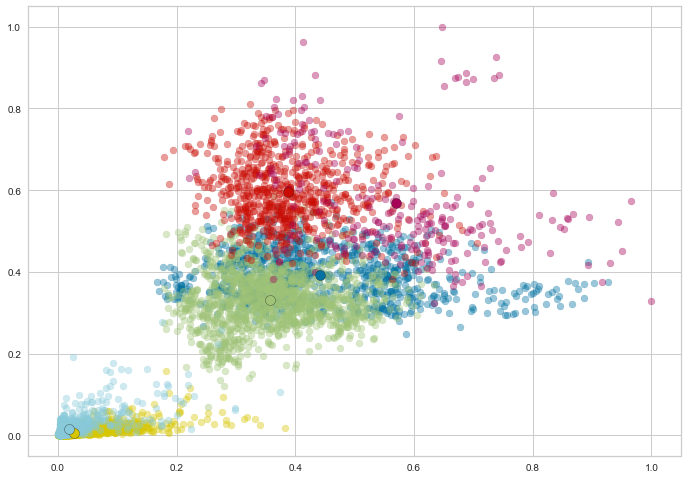

In [25]:
for indexes in clusters: #consiglia di fare pca per visualizzazione
    plt.scatter(X[indexes,2], X[indexes,3], alpha=0.4)
for i,c in enumerate(centers):
    plt.scatter(c[2], c[3], s=100, edgecolors='k')


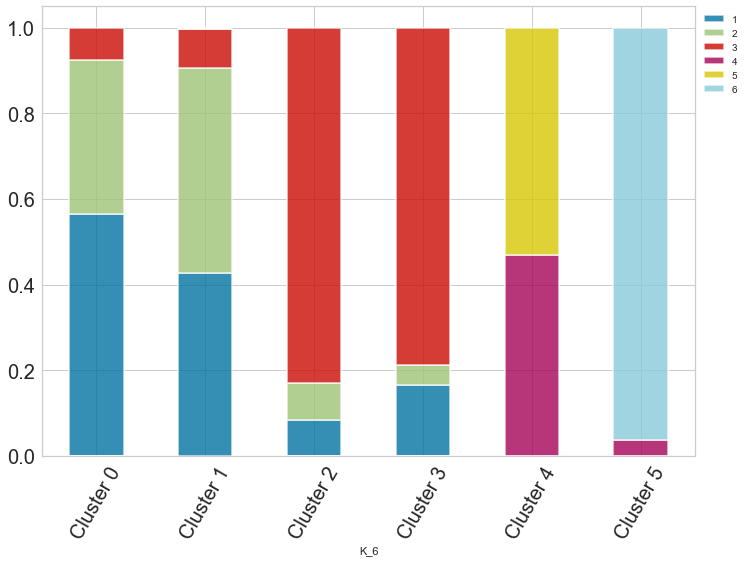

In [26]:
bar = df['Activity'].groupby(X_train_cl['K_6']).value_counts(normalize = True).unstack(1)
bar.plot(kind='bar',stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)
plt.xticks([0, 1, 2,3,4,5],['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4',  'Cluster 5'], rotation = 60, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor =(1,1))



plt.show()

Composizione cluster xmeans
- Cluster 0 = attività SOLO dinamiche ==== cl 1 3 5
- Cluster 1 = attività SOLO dinamiche ==== cl 1 3 5
- Cluster 2 = attività SOLO dinamiche ==== cl 1 3 5
- Cluster 3 = attività SOLO dinamiche ==== cl 1 3 5
- Cluster 4 = attività Statiche 4 e 5 ==== cl 4
- Cluster 5 = attività Statiche 4 e 6 ==== cl 2

Composizione cluster kmeans

- Cluster 0 = attività SOLO statiche
- Cluster 1 = Attività SOLO dinamiche
- Cluster 2 = Attività statiche 6 e 4 
- Cluster 3 = Attivitò SOLO dinamiche
- Cluster 4 = attivitò statiche 4 e 5
- Cluster 5 = attività SOLO dinamiche